In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [8]:
df=pd.read_csv("Resources/prevalence-of-undernourishment.csv")

In [12]:
df.head()


,Entity,Code,Year,Suite of Food Security Indicators - Prevalence of undernourishment (percent) (3-year average) - 210041 - Value - 6121 - % (%)
0,Afghanistan,AFG,2000,46.1
1,Afghanistan,AFG,2001,46.4
2,Afghanistan,AFG,2002,43.7
3,Afghanistan,AFG,2003,39.8
4,Afghanistan,AFG,2004,36.1


In [13]:
df['Suite of Food Security Indicators - Prevalence of undernourishment (percent) (3-year average) - 210041 - Value - 6121 - % (%)'] = df['Suite of Food Security Indicators - Prevalence of undernourishment (percent) (3-year average) - 210041 - Value - 6121 - % (%)'].astype(float)

In [14]:
df=df.rename(columns = {'Suite of Food Security Indicators - Prevalence of undernourishment (percent) (3-year average) - 210041 - Value - 6121 - % (%)':'Percentage'})

In [58]:
df.head()
df2 = df[df['Entity'] == 'Haiti']

df2.mean()     


Year          2008.500000
Percentage      52.694444
Mean                  NaN
dtype: float64

In [45]:
df.groupby("Code")

In [60]:
top10mean = df.groupby('Entity', sort=False)['Percentage'].mean().sort_values(ascending=False).nlargest(10)
top10mean

Entity
Haiti                       52.694444
Zambia                      49.055556
Angola                      45.438889
Zimbabwe                    43.633333
Central African Republic    42.438889
North Korea                 40.150000
Rwanda                      39.894444
Chad                        38.850000
Congo                       38.566667
Liberia                     38.472222
Name: Percentage, dtype: float64

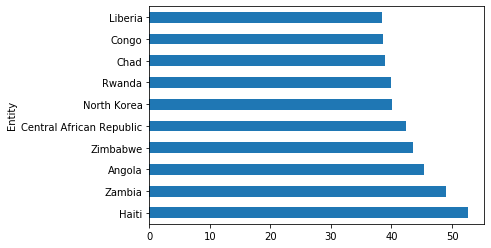

In [61]:
top10mean.plot(kind="barh")

In [88]:
#Find max values for each country
top10max= df.groupby('Entity', sort=False)['Percentage'].max().sort_values(ascending=False).nlargest(10)
top10max

Entity
Angola                      71.5
Central African Republic    59.8
Haiti                       57.6
Rwanda                      55.5
Zambia                      53.5
Ethiopia                    52.0
Zimbabwe                    51.3
Myanmar                     48.3
Djibouti                    48.1
North Korea                 47.8
Name: Percentage, dtype: float64

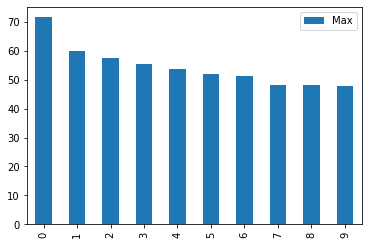

In [100]:
# Change series to df
df2 = pd.DataFrame({'Entity':top10max.index, 'Max':top10max.values})
df2.plot(kind="bar")

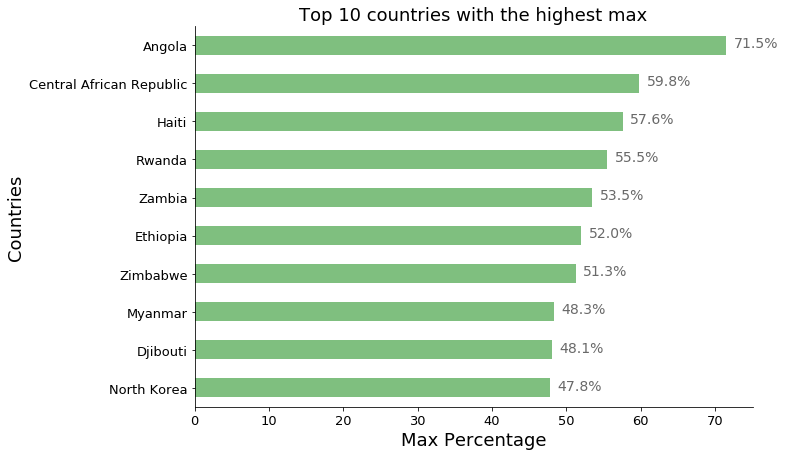

In [133]:
# resource: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

ax = df.groupby('Entity', sort=False)['Percentage'].max().sort_values(ascending=False).nlargest(10).plot(kind='barh', 
                                                                            figsize=(10,7),color="green", alpha=0.5, fontsize=13);

# ax.set_alpha(0.8)
ax.set_title("Top 10 countries with the highest max", fontsize=18)
ax.set_xlabel("Max Percentage", fontsize=18)
ax.set_ylabel("Countries", fontsize=18)

# # create a list to collect the plt.patches data
# totals = []
# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+0.3, \
            str(i.get_width())+'%', fontsize=14,
            color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Pairplot & Heatmap guide
https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c